#LAB 9 Bubble Sort distribution - Fibonacci time

##Bubble Sort Optimized Distribution Without Reppetitions

In [ ]:
# Function to sort an array of numbers using the bubble sort algorithm
def bubbleSort(a):

    # Variable to count the steps
    steps = 0

    # Get the lenght of the array
    n = len(a)

    # Iterate for each element in the array
    for i in range(n):

      # Initialize boolean "swap" variable to evaluate if in a loop a swap has been occur
      swap = False

      # Iterate for n - i - 1 last elements in the array
      for j in range(n - i - 1):

        # Update the value of "swap" variable
        steps += 1
        swap = swap or (a[j] > a[j+1])

        # If the next element is greater than the current one
        steps += 1
        if a[j] > a[j+1]:
          
          # Swap the values
          steps += 1
          a[j], a[j+1] = a[j+1], a[j]

      # If at the end of a loop a swap has not been made
      steps += 1
      if not swap:

        # Stop the algorithm, the array is already sorted
        break;

      # Return the numbers of steps done in the sorting process  
    return steps

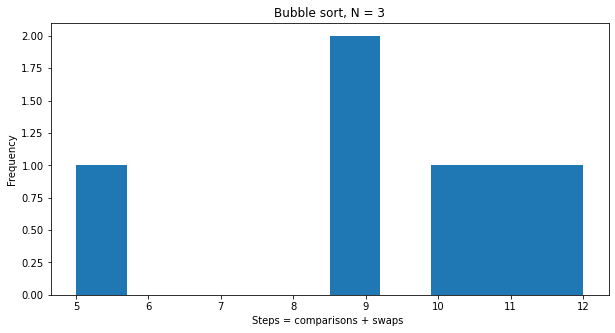

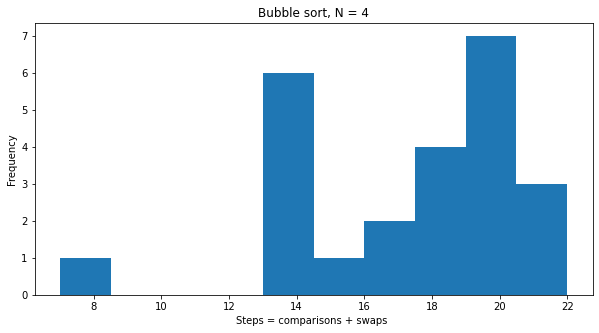

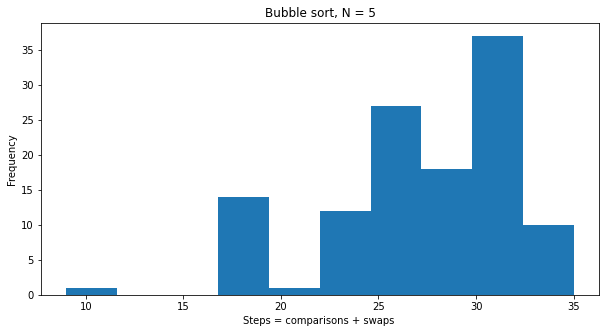

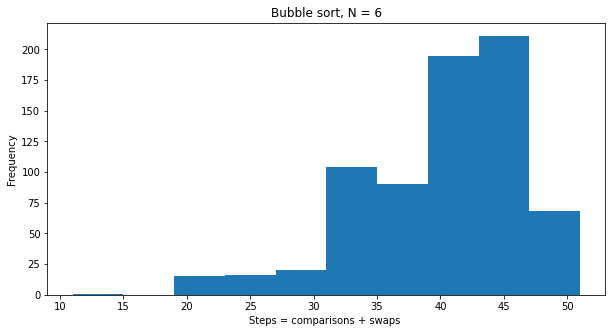

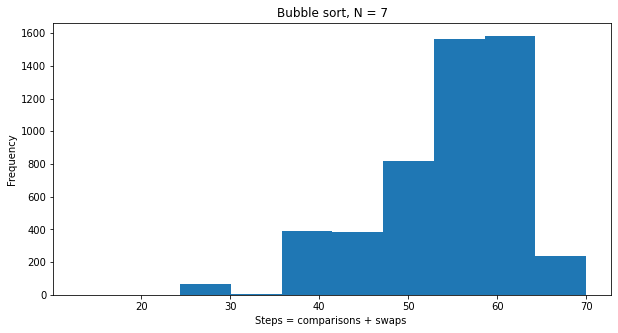

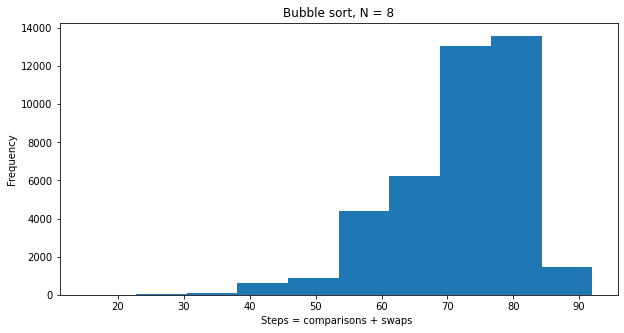

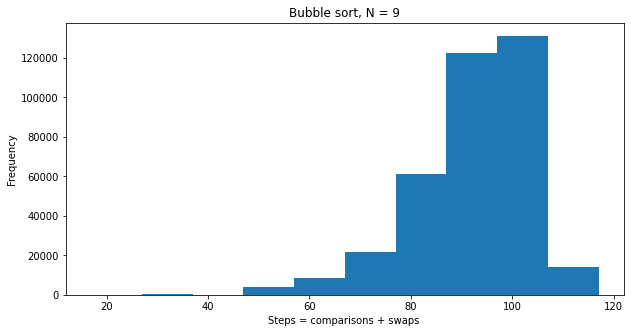

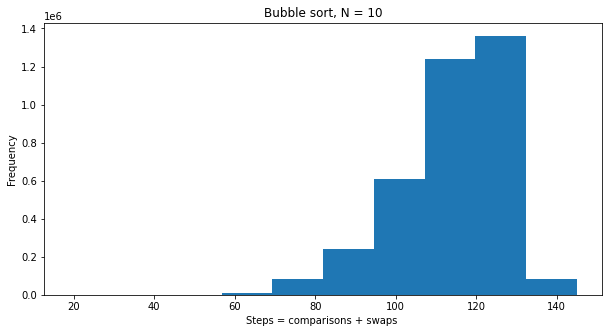

In [ ]:
from itertools import permutations
import matplotlib.pyplot as plt
import numpy as np 
import math

k = 3
n = 11

data = {}
n_list = []
data["min_list"] = []
data["max_list"] = []
data["mean_list"] = []
data["desv_list"] = []

for i in range(k, n):
  fig = plt.figure(k - i + 1, figsize=[10, 5.0])
  perm = permutations(range(1, i + 1))
  times = [] 
  for j in list(perm):
      j = list(j)
      steps = bubbleSort(j)
      times.append(steps)
  b = np.array(range(min(times) - 1, max(times) + 2)) + 0.5
  plt.hist(times)
  plt.title("Bubble sort, N = {0}".format(i))
  plt.xlabel("Steps = comparisons + swaps ")
  plt.ylabel("Frequency")
  n_list.append(i)
  data["min_list"].append(min(times))
  data["max_list"].append(max(times))
  data["mean_list"].append(np.mean(times))
  data["desv_list"].append(np.std(times))

plt.show()

In [ ]:
import pandas as pd

df = pd.DataFrame(data, index=n_list)
df

,min_list,max_list,mean_list,desv_list
3,5,12,9.333333,2.211083
4,7,22,17.041667,3.433647
5,9,35,27.125000,4.796809
6,11,51,39.618056,6.280477
7,13,70,54.541865,7.852170
8,15,92,71.908953,9.497977
9,17,117,91.728503,11.208722
10,19,145,114.007543,12.976845


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


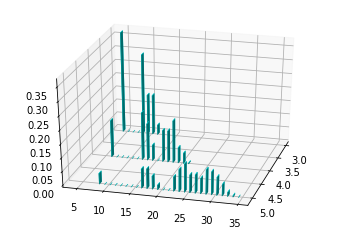

In [ ]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random 

fig = plt.figure()
ax = plt.axes(projection="3d")

k = 3
n = 8

x = []
y = []
z = []
dx = []
dy = []
dz = []

for n in np.arange(3, n - k + 1, 1):
   A = range(n)
   times = []

   for P in product(A, repeat=n):
       t = bubbleSort(list(P)) 
       times.append(t)  
 
   b = np.array(range(min(times) - 1, max(times) + 1)) + 0.5
   H = np.array(np.histogram(times, b))
   H[0] = H[0] / np.sum(H[0])
   for i in range(len(H[0])):
     x.append(n)
     y.append(H[1][i])
     z.append(0)
     dx.append(0.1)
     dy.append(0.1)
     dz.append(H[0][i])

ax.view_init(30, 15)
ax.bar3d(x, y, z, dx, dy, dz, color='aqua', zsort='average')
plt.show()